In [ ]:
import pandas
from pandas import read_excel
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense , Activation
from tensorflow.keras.layers.experimental import preprocessing
import numpy
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
data = read_excel("/content/sales_project.xlsx")

In [ ]:
data.head()

,State,Market Size,Profit,Sales,COGS,Total Expenses,Marketing,Date,Product Type name
0,Washington,Small Market,38,130,53,39,16,2001-01-10,Coffee
1,Washington,Small Market,48,150,61,41,19,2003-01-10,Coffee
2,Washington,Small Market,56,167,68,43,21,2010-01-10,Coffee
3,Washington,Small Market,59,145,53,41,16,2001-01-11,Coffee
4,Washington,Small Market,80,180,69,46,22,2004-01-11,Coffee


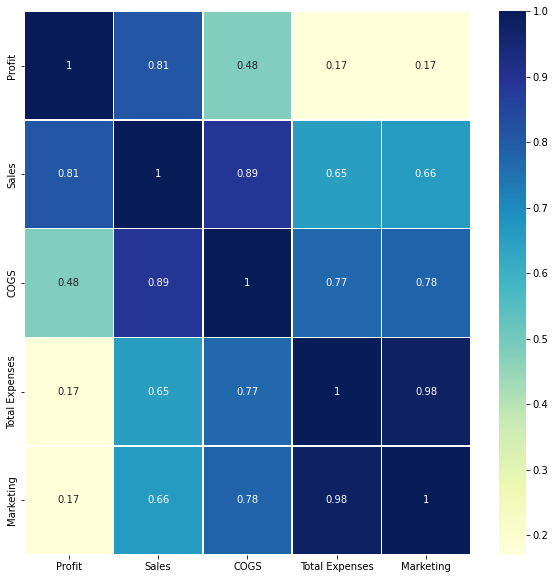

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(round(data.corr(), 2), annot=True, cmap="YlGnBu", linewidth = 0.5)
plt.show()

In [ ]:
data.groupby("Market Size")['State'].value_counts()

Market Size   State     
Major Market  California    288
              Florida       216
              New York      192
              Texas         168
Small Market  Washington    240
Name: State, dtype: int64

In [ ]:
df = pandas.get_dummies(data, 
                            columns=["Market Size","Product Type name","State"], 
                            drop_first=False)
df.head()

,Profit,Sales,COGS,Total Expenses,Marketing,Date,Market Size_Major Market,Market Size_Small Market,Product Type name_Coffee,Product Type name_Espresso,Product Type name_Herbal Tea,Product Type name_Tea,State_California,State_Florida,State_New York,State_Texas,State_Washington
0,38,130,53,39,16,2001-01-10,0,1,1,0,0,0,0,0,0,0,1
1,48,150,61,41,19,2003-01-10,0,1,1,0,0,0,0,0,0,0,1
2,56,167,68,43,21,2010-01-10,0,1,1,0,0,0,0,0,0,0,1
3,59,145,53,41,16,2001-01-11,0,1,1,0,0,0,0,0,0,0,1
4,80,180,69,46,22,2004-01-11,0,1,1,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(1104, 17)

In [ ]:
list(df.columns)

['Profit',
 'Sales',
 'COGS',
 'Total Expenses',
 'Marketing',
 'Date',
 'Market Size_Major Market',
 'Market Size_Small Market',
 'Product Type name_Coffee',
 'Product Type name_Espresso',
 'Product Type name_Herbal Tea',
 'Product Type name_Tea',
 'State_California',
 'State_Florida',
 'State_New York',
 'State_Texas',
 'State_Washington']

In [ ]:
df.shape

(1104, 17)

In [ ]:
df_new = df.drop(['Profit','Date'],axis = 1)
x= df_new[df_new.columns]
y = df["Profit"]
x.shape,y.shape

((1104, 15), (1104,))

# **Data Splitting**

In [ ]:
x_train = x[:884]
x_test = x[884:]

y_train = y[:884]
y_test = y[884:]

In [ ]:
1104*.85

938.4

## **Plot of the Profit data**

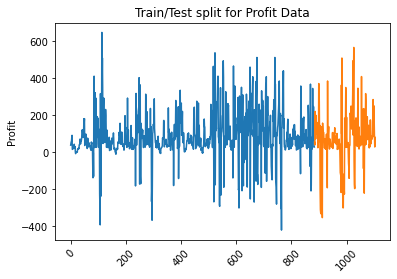

In [ ]:
plt.plot(y_train)
plt.plot(y_test)
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.title("Train/Test split for Profit Data")
plt.show()

In [ ]:
df['Profit'].describe()

count    1104.000000
mean       82.755435
std       128.224029
min      -420.000000
25%        30.000000
50%        65.000000
75%       134.000000
max       646.000000
Name: Profit, dtype: float64

# **Model building**

In [ ]:

model = Sequential()
model .add(Dense (128,activation='relu',input_dim =15))
model .add(Dense (64,activation='relu'))
model .add(Dense (1))
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)
model .compile(loss = "mean_squared_error",optimizer="adam")
ht = model.fit(x_train,y_train,validation_split= 0.15,epochs = 2000,callbacks=[callback])

Epoch 1/2000
24/24 [==============================] - 1s 10ms/step - loss: 6531.1460 - val_loss: 4084.7739
Epoch 2/2000
24/24 [==============================] - 0s 8ms/step - loss: 2382.1094 - val_loss: 1550.2145
Epoch 3/2000
24/24 [==============================] - 0s 5ms/step - loss: 1034.2410 - val_loss: 724.1074
Epoch 4/2000
24/24 [==============================] - 0s 7ms/step - loss: 656.0332 - val_loss: 538.2732
Epoch 5/2000
24/24 [==============================] - 0s 3ms/step - loss: 531.4243 - val_loss: 468.6559
Epoch 6/2000
24/24 [==============================] - 0s 6ms/step - loss: 501.7373 - val_loss: 464.0237
Epoch 7/2000
24/24 [==============================] - 0s 6ms/step - loss: 497.9136 - val_loss: 546.4590
Epoch 8/2000
24/24 [==============================] - 0s 3ms/step - loss: 524.3956 - val_loss: 468.4047
Epoch 9/2000
24/24 [==============================] - 0s 3ms/step - loss: 543.6544 - val_loss: 494.6988
Epoch 10/2000
24/24 [==============================] - 0s 

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               2048      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,369
Trainable params: 10,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_predicted = model.predict(x_test)

7/7 [==============================] - 0s 1ms/step


In [ ]:
y_predicted.shape,y_test.shape

((220, 1), (220,))

# **MAPE/ACC**

In [ ]:
import numpy
y_predicted_1 = y_predicted.reshape(1,220)
y_test_1 = y_test.to_numpy()
APE = abs(numpy.subtract(y_predicted_1,y_test_1))/y_test_1*100
MAPE = numpy.mean(APE)
MAPE

0.12875087823888898

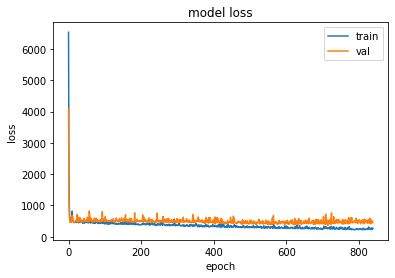

In [ ]:
plt.plot(ht.history['loss'])
plt.plot(ht.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# **Actual Vs Predicted**

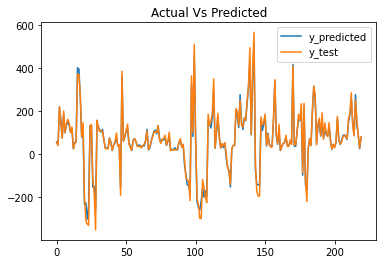

In [ ]:
plt.plot(y_predicted)
plt.plot(y_test_1)
plt.title('Actual Vs Predicted')
#plt.ylabel('loss')
#plt.xlabel('epoch')
plt.legend(['y_predicted', 'y_test'], loc='upper right')
plt.show()

# **`SVM`**

In [ ]:
y= data["Profit"]

In [ ]:
y.shape

(1104,)

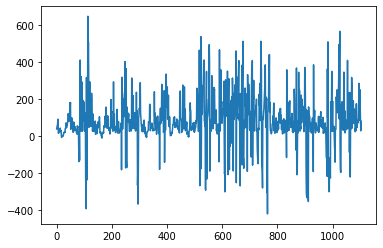

In [ ]:
plt.plot(y)

In [ ]:
x_train = x[:884]
x_test = x[884:]

y_train = y[:884]
y_test = y[884:]

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)


SVR()

In [ ]:
y_predicted= regressor.predict(x_test)
y_predicted.shape
y_predicted.shape,y_test.shape



((220,), (220,))

In [ ]:
import numpy
y_predicted_1 = y_predicted.reshape(1,220)
y_test_1 = y_test.to_numpy()
APE = abs(numpy.subtract(y_predicted_1,y_test_1))/y_test_1*100
MAPE = numpy.mean(APE)
MAPE

3.8296057561351033

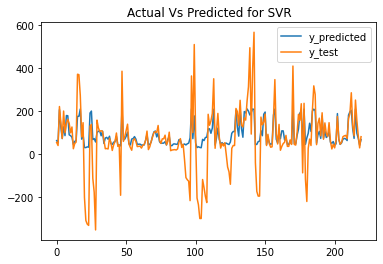

In [ ]:

plt.plot(y_predicted)
plt.plot(y_test_1)
plt.title('Actual Vs Predicted for SVR')
#plt.ylabel('loss')
#plt.xlabel('epoch')
plt.legend(['y_predicted', 'y_test'], loc='upper right')
plt.show()

# **Moving average**

In [ ]:
window_size = 5

In [ ]:
numbers_series = pd.Series(y)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()

In [ ]:
moving_averages_list = moving_averages.tolist()

In [ ]:
final_list = moving_averages_list[window_size - 1:]
print(final_list)

[56.2, 66.8, 60.2, 52.2, 43.8, 32.6, 21.2, 23.0, 26.4, 31.6, 31.6, 29.8, 31.0, 24.4, 14.2, 9.4, 4.6, -1.4, -0.8, 1.4, 1.4, 4.4, 8.0, 11.4, 14.4, 18.8, 19.4, 23.6, 27.4, 33.2, 43.0, 49.8, 51.0, 55.0, 57.2, 56.0, 61.2, 75.2, 87.6, 99.0, 105.6, 105.6, 105.6, 105.8, 118.8, 130.6, 151.0, 135.2, 120.8, 97.2, 77.2, 60.6, 64.8, 70.8, 66.6, 60.0, 44.4, 39.8, 38.8, 41.8, 46.0, 48.6, 47.4, 42.4, 37.6, 35.4, 35.6, 37.2, 30.6, 28.4, 23.6, 27.8, 30.0, 36.6, 35.4, 37.2, 9.4, -27.6, -38.2, -67.4, -16.0, 82.8, 128.0, 133.6, 203.0, 212.0, 159.6, 181.2, 234.4, 196.4, 156.2, 142.4, 141.6, 105.8, 127.2, 140.0, 133.8, 100.6, 94.8, 85.0, 72.8, 18.4, -47.6, -142.6, -96.2, -168.4, -96.0, 2.8, 118.6, 184.6, 305.0, 379.0, 410.8, 382.8, 294.2, 265.4, 222.2, 169.2, 192.8, 187.0, 153.4, 120.6, 149.8, 162.8, 167.4, 171.0, 150.6, 115.0, 92.8, 60.0, 52.2, 52.6, 47.0, 33.6, 35.8, 45.6, 56.0, 53.0, 46.2, 40.2, 33.0, 29.0, 36.8, 35.8, 42.4, 48.8, 45.6, 46.4, 55.4, 57.6, 58.4, 70.4, 74.8, 66.4, 58.0, 46.4, 30.0, 15.8, 12.

In [ ]:
final_list_1 = numpy.array(final_list)

In [ ]:
final_list_1.shape

(1100,)

In [ ]:
y_test = y[4:1204]
y_test.shape

(1100,)

In [ ]:
def mape(a, b): 
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()


In [ ]:
mape(final_list_1,y_test)

0.4497403950844239

In [ ]:
Actual = y_test[:100]
Predicted = final_list_1[:100]

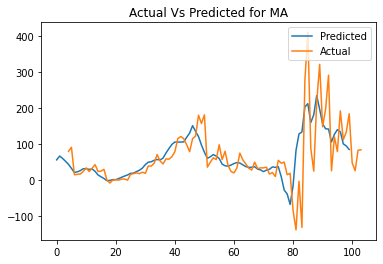

In [ ]:
plt.plot(Predicted)
plt.plot(Actual)
plt.title('Actual Vs Predicted for MA')
plt.legend(['Predicted', 'Actual'], loc='upper right')
plt.show()

# **Performance Comparison**

In [ ]:
Regression= 2.8275
Neural_network= 0.17726491266625677
SVR = 3.8296057561351033
MA = 0.4497403950844239

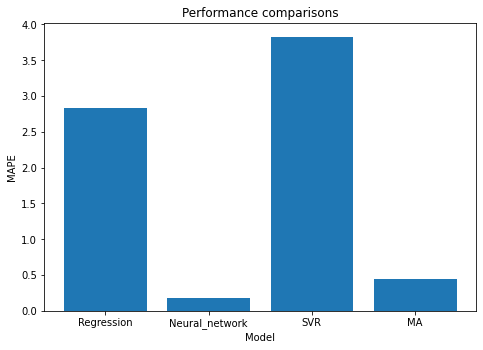

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Model = ['Regression', 'Neural_network', 'SVR', 'MA']
MAPE = [2.8275,0.1772,3.829605,0.4497403950844239]
ax.bar(Model,MAPE)
plt.title('Performance comparisons')
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.show()